<a href="https://colab.research.google.com/github/Raghava1946/PROJECTS-/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras yfinance streamlit

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [16]:
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.320433
2015-01-05  23.635288
2015-01-06  23.637506
2015-01-07  23.968960
2015-01-08  24.889906


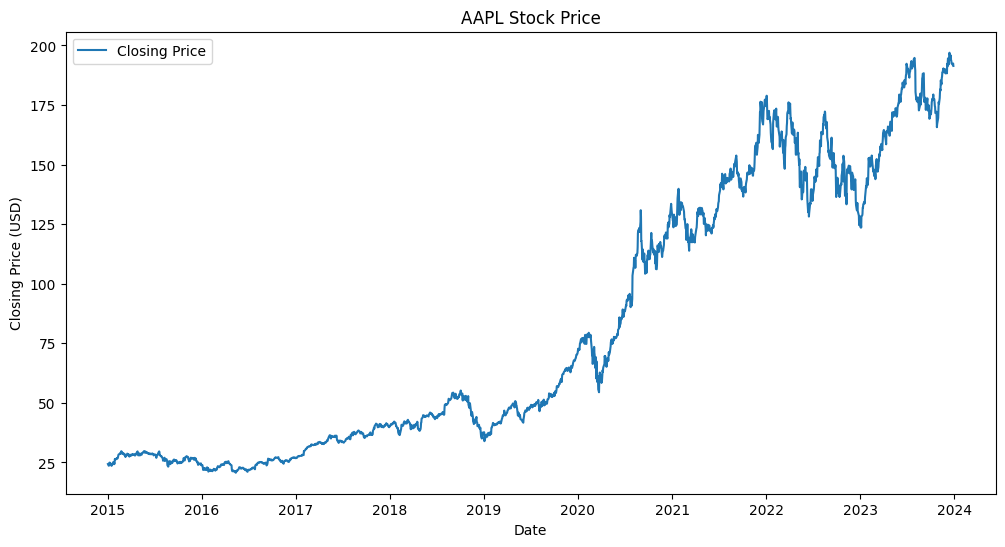

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data, label='Closing Price')
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)


In [19]:
train_size = int(len(data_scaled) * 0.7)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [20]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(100, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_test, Y_test))


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - loss: 0.0061 - val_loss: 0.0017
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 2.3169e-04 - val_loss: 9.1685e-04
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 1.9741e-04 - val_loss: 0.0012
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 2.3134e-04 - val_loss: 0.0028
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 3.0683e-04 - val_loss: 7.1355e-04
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 2.3685e-04 - val_loss: 7.0757e-04
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 1.5197e-04 - val_loss: 7.2678e-04
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.5463e-04 - val_loss: 5.6259e-04
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 1.2739e-04 - val_loss: 5.9940e-04
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 1.5624e-04 - val_loss: 5.3039e-04
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 1.7373e

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


In [ ]:
train_dates = data.index[:train_size]
test_dates = data.index[train_size + time_step + 1:]


plt.figure(figsize=(14,6))
plt.plot(train_dates, scaler.inverse_transform(train_data)[:train_size], label="Actual Prices (Train)")

plt.plot(test_dates, scaler.inverse_transform(test_data)[time_step + 1:], label="Actual Prices (Test)")
plt.plot(test_dates, test_predictions, label="Predicted Prices", linestyle='dashed')

plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()


In [ ]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(50),
    Dense(1)
])


In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(100, return_sequences=True, input_shape=(time_step, 1)),
    GRU(100),
    Dense(50),
    Dense(1)
])
